# Seismic Bumps

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Loading Data

In [24]:
Datset = arff.loadarff("Classification_Datasets/8_Seismic_Bumps/seismic-bumps.arff") 


In [25]:
df = pd.DataFrame(Datset[0])
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


## Data preparation and Analysis

In [26]:
print(np.count_nonzero(Datset==np.nan))

0


In [27]:
frequency = df['class'].value_counts()
print(frequency)
print("-------")

b'0'    2414
b'1'     170
Name: class, dtype: int64
-------


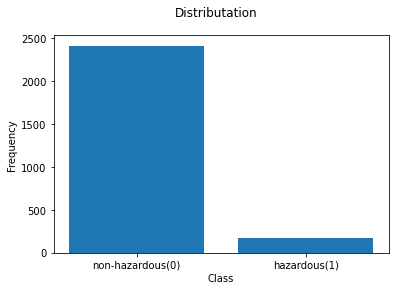

In [34]:
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.bar( ("non-hazardous(0)","hazardous(1)"), frequency)
plt.suptitle("Distributation")
plt.show()

In [35]:
df.dtypes

seismic             int32
seismoacoustic      int32
shift               int32
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
ghazard             int32
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
class               int32
dtype: object

In [30]:
for column in df:
    if df[column].dtypes != np.float64:
        # if data in column is type string, we want to convert it to equivalent numerical labels
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(df[column])
        df[column] = integer_encoded

In [31]:
df.dtypes

seismic             int32
seismoacoustic      int32
shift               int32
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
ghazard             int32
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
class               int32
dtype: object

ok


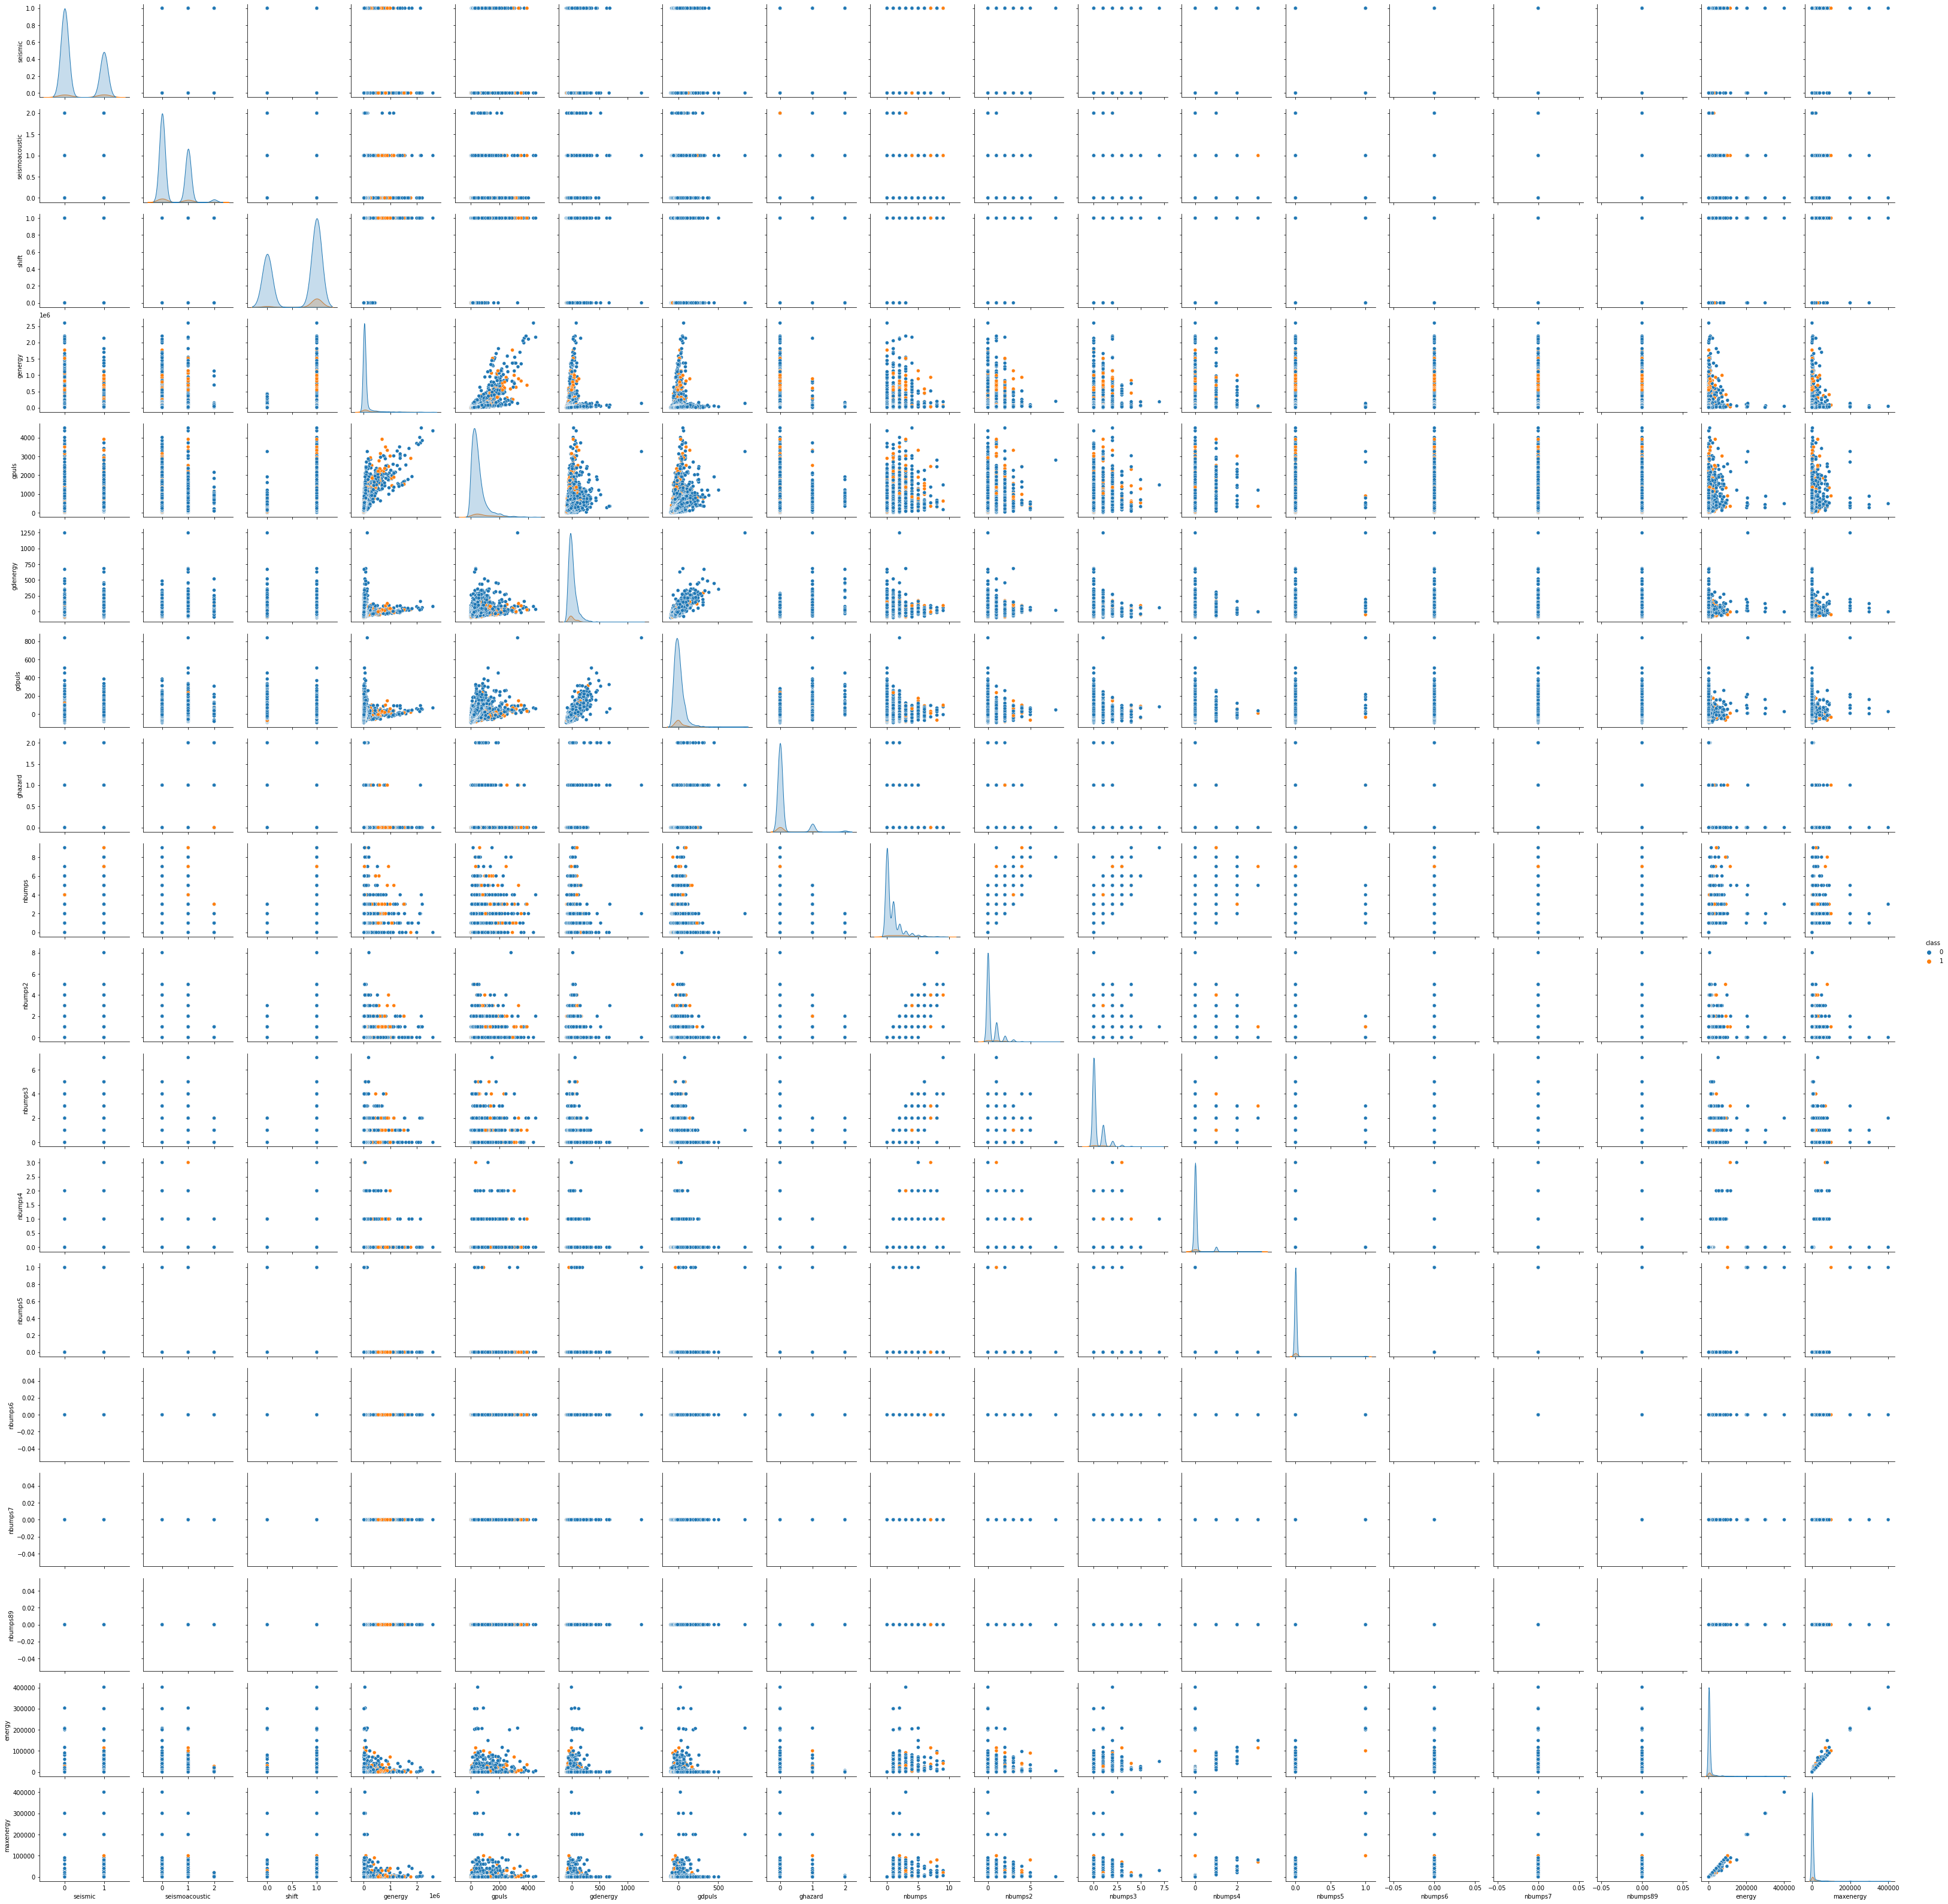

In [12]:
sns.pairplot(df, hue="class")
print("ok")

<AxesSubplot:>

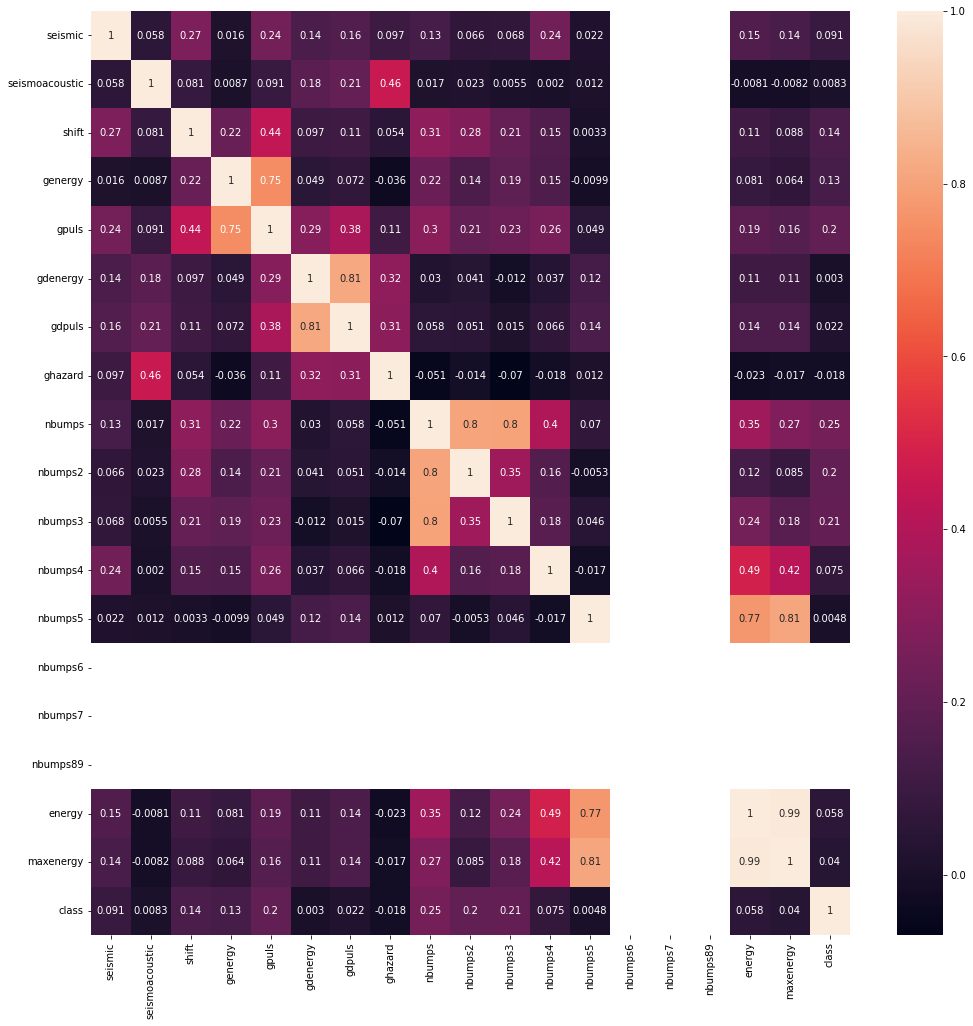

In [13]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot =True)

### Defining Dictionary of Models

In [62]:
MODELS = {'logistic_r', 'svc', 'tree', 'random_forest_r', 'knn', 'adaboost', 'gnb', 'nn'}
seismic_bumps_dict = {}    

## Train and Test set

In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
# y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))

In [16]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [17]:
StScale = StandardScaler()
X_train = StScale.fit_transform(X_train)
X_test = StScale.transform(X_test)

In [36]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    print(classification_report(y_test, prediction))
    print(confusion_matrix (y_test, prediction))
    ConfusionMatrixDisplay.from_predictions(y_test, prediction);
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    W_recall = recall_score(y_test, prediction,average='weighted')
    malignant_recall = recall_score(y_test, prediction,pos_label=1,average='binary')
    
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])
    table.append(['weighted_Recall',W_recall])
    table.append(['malignant_Recall',malignant_recall])

    
    prediction_trn = curr_model.predict(X_train)
    accuracy_trn = accuracy_score(y_train, prediction_trn)
    weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
    macro_f1_trn = f1_score(y_train, prediction_trn, average='macro')
    W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
    malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=1,average='binary')
    
    table.append(['Accuracy (tarin)',accuracy_trn])
    table.append(['weighted_f1 (tarin)', weighted_f1_trn])
    table.append(['macro_f1 (tarin)',macro_f1_trn])
    table.append(['weighted_Recall (tarin)',W_recall_trn])
    table.append(['malignant_Recall (tarin)',malignant_recall_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

    return prediction

## 1. LogisticRegression for Classification

In [19]:
logistic_r = LogisticRegression(random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(random_state=0)

## LogisticRegression Analysis

In [63]:
seismic_bumps_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(seismic_bumps_dict['logistic_r'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Accuracy               | 0.941973 |
+------------------------+----------+
| weighted_f1            | 0.922663 |
+------------------------+----------+
| macro_f1               | 0.51628  |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       490
           1       0.20      0.04      0.06        27

    accuracy                           0.94       517
   macro avg       0.57      0.51      0.52       517
weighted avg       0.91      0.94      0.92       517

[[486   4]
 [ 26   1]]


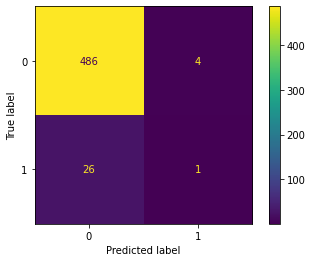

In [21]:
print(classification_report(y_test, lr_prediction))
print(confusion_matrix (y_test, lr_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, lr_prediction);

## 2. Support vector classification

In [22]:
svc = SVC(class_weight ='balanced').fit(X_train, y_train)

In [23]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.930 total time=   0.1s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.930 total time=   0.1s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.932 total time=   0.0s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.932 total time=   0.1s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.930 total time=   0.0s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;

{'gamma': 0.07, 'C': 0.01}

In [24]:
svc_model.best_estimator_

SVC(C=0.01, gamma=0.07)

## Support vector classification Analysis

In [64]:
seismic_bumps_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(seismic_bumps_dict['svc'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| gamma                  | 0.07     |
+------------------------+----------+
| C                      | 0.01     |
+------------------------+----------+
| Accuracy               | 0.947776 |
+------------------------+----------+
| weighted_f1            | 0.922364 |
+------------------------+----------+
| macro_f1               | 0.486594 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       490
           1       0.00      0.00      0.00        27

    accuracy                           0.95       517
   macro avg       0.47      0.50      0.49       517
weighted avg       0.90      0.95      0.92       517

[[490   0]
 [ 27   0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

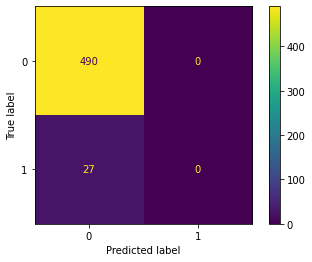

In [26]:
print(classification_report(y_test, svc_prediction))
print(confusion_matrix (y_test, svc_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svc_prediction);

## Decision tree

In [27]:
tree = DecisionTreeClassifier(class_weight ='balanced').fit(X_train, y_train)

In [28]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 55.88135039273247, 'min_samples_split': 0.7151893663724195}

## Decision tree Analysis

In [65]:
seismic_bumps_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(seismic_bumps_dict['tree'])

+------------------------+-----------+
| Parameters / Metrics   |     Tuned |
+========================+===========+
| max_depth              | 55.8814   |
+------------------------+-----------+
| min_samples_split      |  0.715189 |
+------------------------+-----------+
| Accuracy               |  0.947776 |
+------------------------+-----------+
| weighted_f1            |  0.922364 |
+------------------------+-----------+
| macro_f1               |  0.486594 |
+------------------------+-----------+


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       490
           1       0.00      0.00      0.00        27

    accuracy                           0.95       517
   macro avg       0.47      0.50      0.49       517
weighted avg       0.90      0.95      0.92       517

[[490   0]
 [ 27   0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

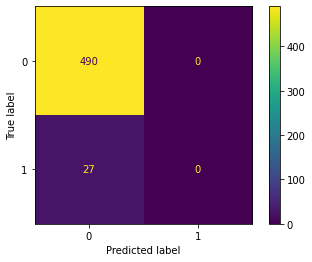

In [30]:
print(classification_report(y_test, tree_prediction))
print(confusion_matrix (y_test, tree_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, tree_prediction);

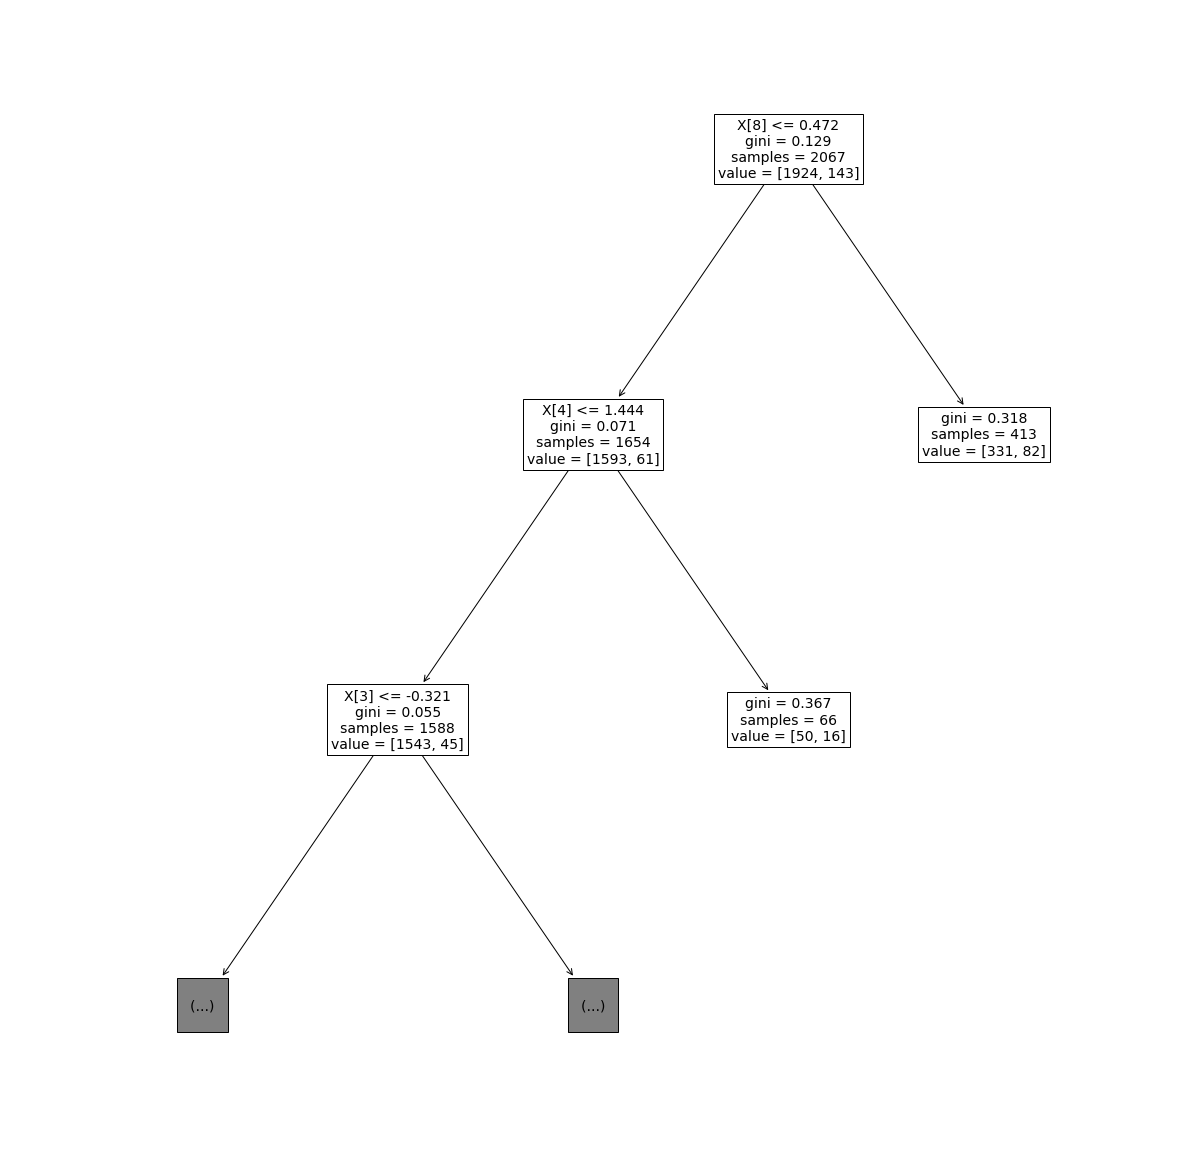

In [31]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

In [32]:
forest = RandomForestClassifier(class_weight='balanced')
forest = forest.fit(X_train, y_train)

In [33]:
parameters = {
    'n_estimators': range(100,150),
    'max_depth': scipy.stats.uniform(1, 100),
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 53.184832175007166, 'n_estimators': 123}

In [66]:
seismic_bumps_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
forest_prediction = model_results(seismic_bumps_dict['random_forest_r'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| max_depth              |  53.1848   |
+------------------------+------------+
| n_estimators           | 123        |
+------------------------+------------+
| Accuracy               |   0.941973 |
+------------------------+------------+
| weighted_f1            |   0.925486 |
+------------------------+------------+
| macro_f1               |   0.543824 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       490
           1       0.29      0.07      0.12        27

    accuracy                           0.94       517
   macro avg       0.62      0.53      0.54       517
weighted avg       0.92      0.94      0.93       517

[[485   5]
 [ 25   2]]


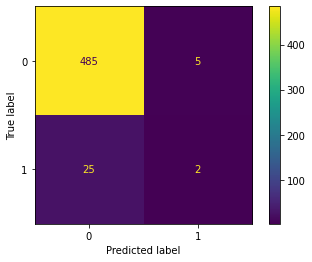

In [35]:
print(classification_report(y_test, forest_prediction))
print(confusion_matrix (y_test, forest_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, forest_prediction);

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [36]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [37]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best Hyperparameters = {'leaf_size': 20.172075941288885, 'n_neighbors': 40, 'weights': 'distance'}


In [67]:
seismic_bumps_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(seismic_bumps_dict['knn'])

+------------------------+--------------------+
| Parameters / Metrics   | Tuned              |
+========================+====================+
| leaf_size              | 20.172075941288885 |
+------------------------+--------------------+
| n_neighbors            | 40                 |
+------------------------+--------------------+
| weights                | distance           |
+------------------------+--------------------+
| Accuracy               | 0.9477756286266924 |
+------------------------+--------------------+
| weighted_f1            | 0.9223635710567613 |
+------------------------+--------------------+
| macro_f1               | 0.4865938430983118 |
+------------------------+--------------------+


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       490
           1       0.00      0.00      0.00        27

    accuracy                           0.95       517
   macro avg       0.47      0.50      0.49       517
weighted avg       0.90      0.95      0.92       517

[[490   0]
 [ 27   0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

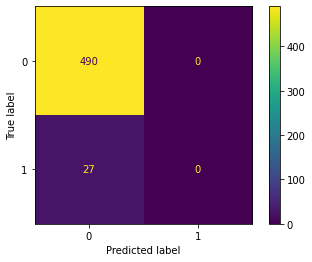

In [39]:
print(classification_report(y_test, knn_prediction))
print(confusion_matrix (y_test, knn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction);

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [40]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [41]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters = {'learning_rate': 3.329470565333281, 'n_estimators': 37}


In [68]:
seismic_bumps_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(seismic_bumps_dict['adaboost'])

+------------------------+-----------+
| Parameters / Metrics   |     Tuned |
+========================+===========+
| learning_rate          |  3.32947  |
+------------------------+-----------+
| n_estimators           | 37        |
+------------------------+-----------+
| Accuracy               |  0.945841 |
+------------------------+-----------+
| weighted_f1            |  0.921396 |
+------------------------+-----------+
| macro_f1               |  0.486083 |
+------------------------+-----------+


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       490
           1       0.00      0.00      0.00        27

    accuracy                           0.95       517
   macro avg       0.47      0.50      0.49       517
weighted avg       0.90      0.95      0.92       517

[[489   1]
 [ 27   0]]


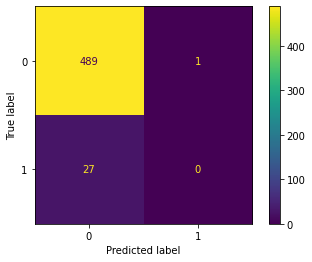

In [43]:
print(classification_report(y_test, adaboost_prediction))
print(confusion_matrix (y_test, adaboost_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_prediction);

## 7. Gaussian Naive Bayes classification

In [44]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [45]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

In [69]:
seismic_bumps_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(seismic_bumps_dict['gnb'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Accuracy               | 0.84913  |
+------------------------+----------+
| weighted_f1            | 0.880743 |
+------------------------+----------+
| macro_f1               | 0.575802 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.97      0.87      0.92       490
           1       0.16      0.44      0.24        27

    accuracy                           0.85       517
   macro avg       0.56      0.66      0.58       517
weighted avg       0.92      0.85      0.88       517

[[427  63]
 [ 15  12]]


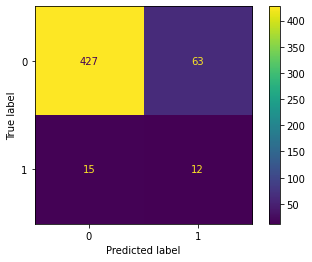

In [47]:
print(classification_report(y_test, naive_bayes_prediction))
print(confusion_matrix (y_test, naive_bayes_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, naive_bayes_prediction);

## 8. Neural Network classification

In [48]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [49]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters = {'leaf_size': 20.172075941288885, 'n_neighbors': 40, 'weights': 'distance'}


In [70]:
seismic_bumps_dict["nn"] = {"model": mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(seismic_bumps_dict['nn'])

+------------------------+---------------------+
| Parameters / Metrics   | Tuned               |
+========================+=====================+
| alpha                  | 0.06739390723749765 |
+------------------------+---------------------+
| learning_rate          | constant            |
+------------------------+---------------------+
| max_iter               | 1338                |
+------------------------+---------------------+
| Accuracy               | 0.941972920696325   |
+------------------------+---------------------+
| weighted_f1            | 0.9226631360103779  |
+------------------------+---------------------+
| macro_f1               | 0.5162799401197605  |
+------------------------+---------------------+


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       490
           1       0.20      0.04      0.06        27

    accuracy                           0.94       517
   macro avg       0.57      0.51      0.52       517
weighted avg       0.91      0.94      0.92       517

[[486   4]
 [ 26   1]]


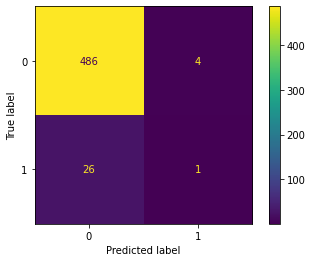

In [51]:
print(classification_report(y_test, nn_prediction))
print(confusion_matrix (y_test, nn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, nn_prediction);

+-----------------+----------+----------+----------+------------+----------+-----------+------------+---------------+
| model           |      acc |     w.f1 |    w.rec |   clas.rec |   tr.acc |   tr.w.f1 |   tr.w.rec |   tr.clas.rec |
+=================+==========+==========+==========+============+==========+===========+============+===============+
| knn             | 0.947776 | 0.922364 | 0.947776 |  0         | 1        |  1        |   1        |    1          |
+-----------------+----------+----------+----------+------------+----------+-----------+------------+---------------+
| gnb             | 0.84913  | 0.880743 | 0.84913  |  0.444444  | 0.855346 |  0.876291 |   0.855346 |    0.440559   |
+-----------------+----------+----------+----------+------------+----------+-----------+------------+---------------+
| logistic_r      | 0.941973 | 0.922663 | 0.941973 |  0.037037  | 0.928399 |  0.899735 |   0.928399 |    0.027972   |
+-----------------+----------+----------+----------+----

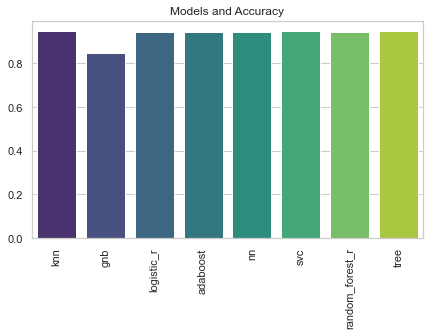

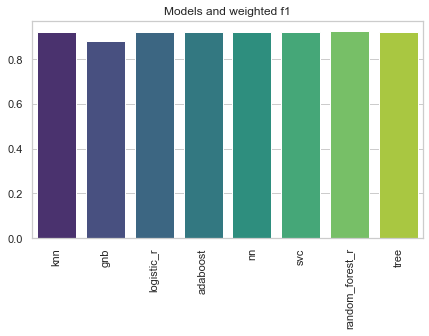

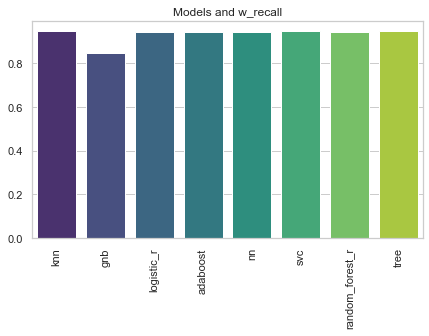

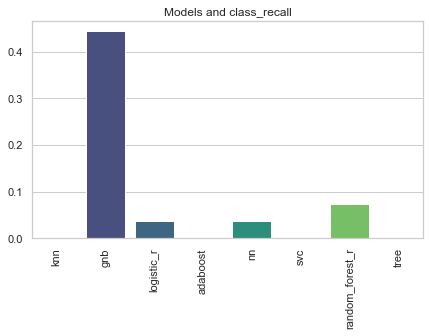

In [73]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score


def cross_checking_model_results(dictionary):
    table = [["model", "acc", "w.f1", 'w.rec', 'clas.rec',
              'tr.acc','tr.w.f1', 'tr.w.rec', 'tr.clas.rec']]
    x_models = []
    y_accuracy = []
    y_wf1 = []
    w_recall = []
    m_recall = []
    
    trny_accuracy = []
    trny_wf1 = []
    trnw_recall = []
    trnm_recall = []

    for model_key in MODELS:
        model = dictionary[model_key]['model']
        
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        weighted_f1 = f1_score(y_test, prediction, average='weighted')
        W_recall = recall_score(y_test, prediction,average='weighted')
        malignant_recall = recall_score(y_test, prediction,pos_label=1,average='binary')
        
        prediction_trn = model.predict(X_train)
        accuracy_trn = accuracy_score(y_train, prediction_trn)
        weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
        W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
        malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=1,average='binary')
        table.append([model_key, accuracy, weighted_f1, W_recall,malignant_recall,
                     accuracy_trn, weighted_f1_trn, W_recall_trn,malignant_recall_trn])
        
        x_models.append(model_key)
        y_accuracy.append(accuracy)
        y_wf1.append(weighted_f1)
        w_recall.append(W_recall)
        m_recall.append(malignant_recall)
        
        trny_accuracy.append(accuracy_trn)
        trny_wf1.append(weighted_f1_trn)
        trnw_recall.append(W_recall_trn)
        trnm_recall.append(malignant_recall_trn)
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_accuracy, palette="viridis")
    ax1.set_title('Models and Accuracy')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_wf1, palette="viridis")
    ax2.set_title('Models and weighted f1')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=w_recall, palette="viridis")
    ax2.set_title('Models and w_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=m_recall, palette="viridis")
    ax2.set_title('Models and class_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(seismic_bumps_dict)

In [ ]:
import pickle
with open('base_classification_dict.dictionary', 'rb') as config_dictionary_file:
    base_classification_dict = pickle.load(config_dictionary_file)

base_classification_dict['seismic_bumps_dict']= seismic_bumps_dict

with open('base_classification_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_classification_dict, config_dictionary_file)